In [1]:
%run ANN.ipynb
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from numpy import asarray
import matplotlib.pyplot as plt
import math as mt
np.random.seed(10)
def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output
def compile_(network,epochs,learning_rate,x,y):
    
    for epoch in range(epochs):
        error = 0
        for x_, y_true in zip(x, y):
            output = x_
            for layer in network:
                output = layer.forward(output)

            # error (display purpose only)
            error += mse(y_true, output)

            # backward
            output_error = mse_prime(y_true, output)

            for layer in reversed(network):

                output_error = layer.backward(output_error, learning_rate)

        error /= len(x)
    return error
    

/home/nicolas/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nicolas/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/nicolas/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/nicolas/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:5

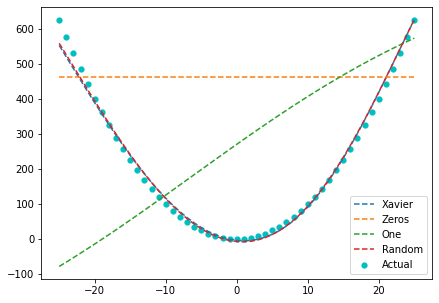

In [2]:
# define the dataset
x = asarray([i for i in range(-25,26)])
y = asarray([i**2 for i in x])
# reshape arrays into into rows and cols
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))
x = x.reshape((51,1))
y = y.reshape((51,1))
# separately scale the input and output variables
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)
x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)




epoch = 300
learning_rate = 0.1

network = [
    fullyConnectedLayer(1, 2,'default'),
    activationLayer(tanh, tanh_prime),
    fullyConnectedLayer(2, 1,'default'),
    ]
compile_(network,epoch,learning_rate,x,y)
y_hat_2=[]    
for x_ in x:
    y_hat_2.append(predict(network, x_)[0])
yhat_2 = scale_y.inverse_transform(y_hat_2)

network = [
    fullyConnectedLayer(1, 2,'zeros'),
    activationLayer(tanh, tanh_prime),
    fullyConnectedLayer(2, 1,'zeros'),
    ]
compile_(network,epoch,learning_rate,x,y)
y_hat_3=[]    
for x_ in x:
    y_hat_3.append(predict(network, x_)[0])
yhat_3 = scale_y.inverse_transform(y_hat_3)

network = [
    fullyConnectedLayer(1, 2,'ones'),
    activationLayer(tanh, tanh_prime),
    fullyConnectedLayer(2, 1,'ones'),
    ]
compile_(network,epoch,learning_rate,x,y)
y_hat_4=[]    
for x_ in x:
    y_hat_4.append(predict(network, x_)[0])
yhat_4 = scale_y.inverse_transform(y_hat_4)

network = [
    fullyConnectedLayer(1, 2,'random'),
    activationLayer(tanh, tanh_prime),
    fullyConnectedLayer(2, 1,'random'),
    ]
compile_(network,epoch,learning_rate,x,y)
y_hat_5=[]    
for x_ in x:
    y_hat_5.append(predict(network, x_)[0])
yhat_5 = scale_y.inverse_transform(y_hat_5)

fig = plt.figure(figsize=(7,5))
plt.scatter(x_plot,y_plot,c='c',linewidths=0.2 ,label='Actual')
plt.plot(x_plot,yhat_2,'--',label='Xavier')
plt.plot(x_plot,yhat_3,'--',label='Zeros')
plt.plot(x_plot,yhat_4,'--',label='One')
plt.plot(x_plot,yhat_5,'--',label='Random')
plt.legend()
plt.show()
